In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [69]:
data = pd.read_csv("final final transactions.csv")
data

,TX_AMOUNT,TX_TIME_SECONDS
0,533.07,31
1,808.56,130
2,1442.94,476
3,620.65,569
4,490.66,634
...,...,...
1048570,325.64,9454033
1048571,20.38,9454048
1048572,182.79,9454053
1048573,455.44,9454059


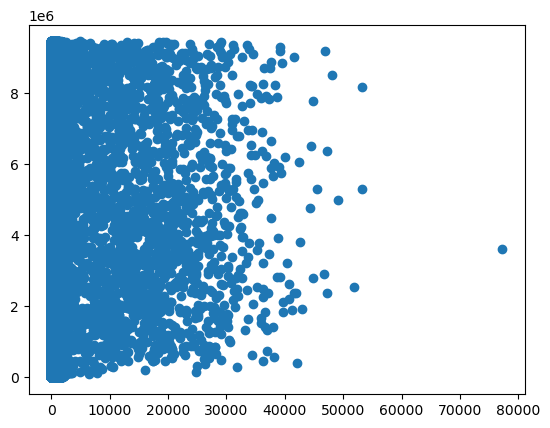

In [71]:
X=data.get('TX_AMOUNT')
y=data.get('TX_TIME_SECONDS')
plt.scatter(X,y)

In [85]:
dbscan = DBSCAN(eps=0.3, min_samples=2)
labels = dbscan.fit_predict(data)

In [87]:
data["cluster"] = labels


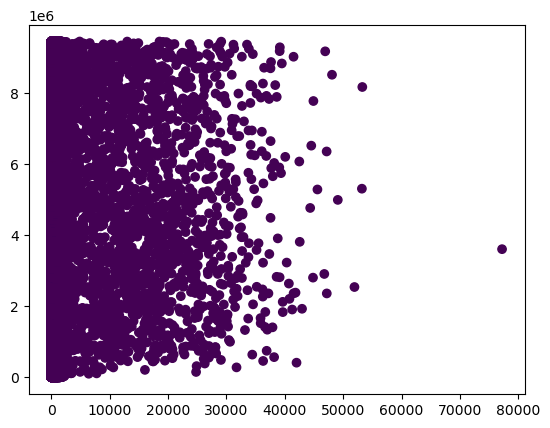

In [89]:
plt.scatter(X,y,c=labels)


In [90]:
print(data["cluster"].value_counts())

cluster
-1     1048513
 0           2
 29          2
 28          2
 27          2
 26          2
 25          2
 24          2
 23          2
 22          2
 21          2
 20          2
 19          2
 18          2
 17          2
 16          2
 15          2
 14          2
 13          2
 12          2
 11          2
 10          2
 9           2
 8           2
 7           2
 6           2
 5           2
 4           2
 3           2
 2           2
 1           2
 30          2
Name: count, dtype: int64


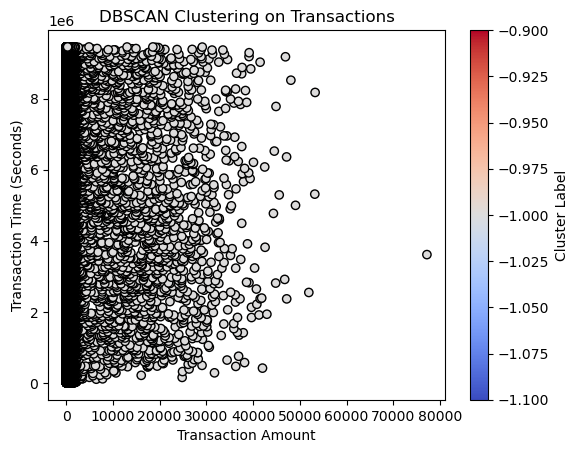

cluster
-1.0    1048575
Name: count, dtype: int64


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Load dataset
data = pd.read_csv("final final transactions.csv")

# Select features for clustering
X = data[['TX_AMOUNT', 'TX_TIME_SECONDS']].dropna()  # Ensure no NaN values

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)
labels = dbscan.fit_predict(X)

# Assign cluster labels to the dataset
data.loc[X.index, "cluster"] = labels

# Scatter plot with clusters
plt.scatter(X['TX_AMOUNT'], X['TX_TIME_SECONDS'], c=labels, cmap='coolwarm', edgecolor='k')
plt.xlabel("Transaction Amount")
plt.ylabel("Transaction Time (Seconds)")
plt.title("DBSCAN Clustering on Transactions")
plt.colorbar(label="Cluster Label")
plt.show()

# Print cluster counts
print(data["cluster"].value_counts())


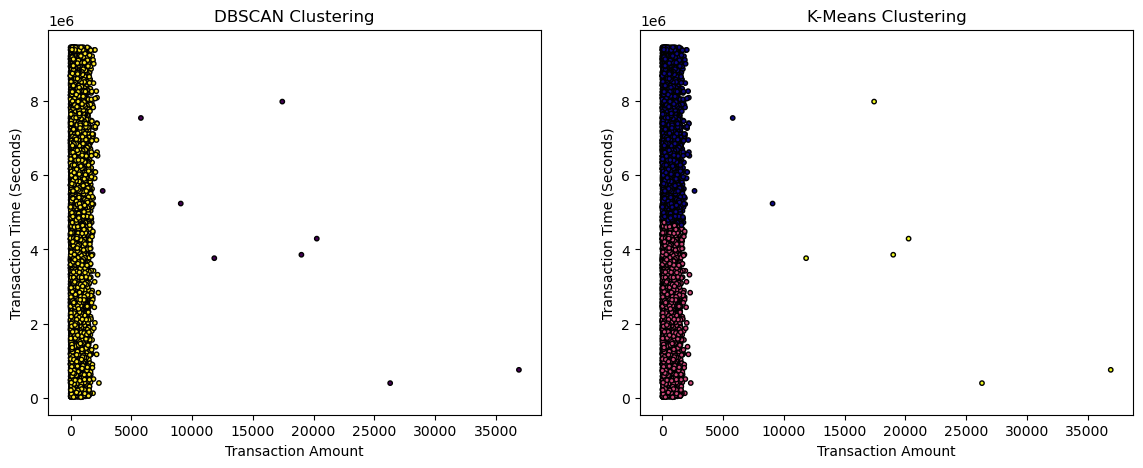

DBSCAN Cluster Distribution:
 DBSCAN_Cluster
 0    9991
-1       9
Name: count, dtype: int64 

K-Means Cluster Distribution:
 KMeans_Cluster
1    5031
0    4963
2       6
Name: count, dtype: int64 



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset from the given file location
file_path = r"D:\Final Transactions.csv\final final transactions.csv"
data = pd.read_csv(file_path)

# Take a smaller subset to prevent crashes (10,000 rows instead of 1M)
subset_size = 10000
data_sample = data.sample(n=subset_size, random_state=42)

# Select features
X = data_sample[['TX_AMOUNT', 'TX_TIME_SECONDS']].dropna()

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ======== Apply DBSCAN (optimized) ========
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjusted for better clustering
dbscan_labels = dbscan.fit_predict(X_scaled)

# ======== Apply K-Means ========
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Assign cluster labels
data_sample["DBSCAN_Cluster"] = dbscan_labels
data_sample["KMeans_Cluster"] = kmeans_labels

# ======== Plot Results ========
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# DBSCAN Plot
axes[0].scatter(X['TX_AMOUNT'], X['TX_TIME_SECONDS'], c=dbscan_labels, cmap='viridis', edgecolor='k', s=10)
axes[0].set_title("DBSCAN Clustering")

# K-Means Plot
axes[1].scatter(X['TX_AMOUNT'], X['TX_TIME_SECONDS'], c=kmeans_labels, cmap='plasma', edgecolor='k', s=10)
axes[1].set_title("K-Means Clustering")

for ax in axes:
    ax.set_xlabel("Transaction Amount")
    ax.set_ylabel("Transaction Time (Seconds)")

plt.show()

# Print cluster distributions
print("DBSCAN Cluster Distribution:\n", data_sample["DBSCAN_Cluster"].value_counts(), "\n")
print("K-Means Cluster Distribution:\n", data_sample["KMeans_Cluster"].value_counts(), "\n")
